In [1]:
import numpy as np
import matplotlib.pyplot as plt
import optimizers as opt
import tasks as task

# Функції, що вирішують відповідні задачі

In [16]:
def solve_a1(x_a):
    t = 1

    x = np.empty(shape=(1001), dtype=np.float32)
    y = np.empty(shape=(1001), dtype=np.float32)
    z = np.empty(shape=(1001), dtype=np.float32)

    h = 2 / 1000

    z[0] = 1
    y[0] = 1
    x[0] = x_a

    for i in range(1, 1001):
        z[i] = z[i - 1] + h * ( 
            (x[i - 1] * t) ** 2 - ((y[i - 1] ** 4 + x[i - 1] ** 3 - 3 * np.sin(t * z[i - 1])) ** 2) * np.cos(z[i - 1]))
        y[i] = y[i - 1] + h * (y[i - 1] ** 4 + x[i - 1] ** 3 - 3 * np.sin(t * z[i - 1]))
        x[i] = x[i - 1] + h * z[i - 1]
        t += h

    return x, y

def solve_a5(vec):
    z_a, w_a = vec # x_prime_a, y_prime_a

    t = 1
    h = 2 / 1000

    x = np.empty(shape=(1001), dtype=np.float32)
    y = np.empty(shape=(1001), dtype=np.float32)
    z = np.empty(shape=(1001), dtype=np.float32)
    w = np.empty(shape=(1001), dtype=np.float32)

    x[0] = 2
    y[0] = -1
    z[0] = z_a
    w[0] = w_a

    for i in range(1, 1001):
        x[i] = x[i - 1] + h * z[i - 1]
        y[i] = y[i - 1] + h * w[i - 1]
        z[i] = z[i - 1] + h * (
            np.exp(- t ** 2) - 4 * np.exp(-np.abs(x[i - 1] * w[i - 1]) * np.cos(np.sin((5 * z[i - 1] ** 2) * y[i - 1] + t ** 2)) -
            np.log(3 * t ** 2 + (t * x[i - 1] + w[i - 1]) ** 2))
        )
        w[i] = w[i - 1] + h * (
            np.exp(-t) * np.cos(2 * t) + np.cos(np.abs((3 * x[i - 1] - w[i - 1]) / (z[i - 1] ** 2 + 1)) -
            np.log(10 + np.exp(-np.abs( (x[i - 1] ** 2) * (w[i - 1] ** 3) ))))
        ) 

        t += h

    return x, y

# Функція Растрігіна

In [80]:
rastrigin = task.Rastrigin(20, 1)
ras = [0] * 2

ras_ba = opt.BA(10_000, 0.01, 0.99, rastrigin)
ras_co = opt.CO(10_000, 1, 0.5, rastrigin)

ras[0] = ras_ba.main_loop(max_iter=250, init_r=0.9, init_A=1, alpha=0.97, gamma=0.97, delta=0.9, times=5)
ras[1] = ras_co.main_loop(max_iter=500, cookoo=100, times=5)

Iteration: 1
Min value: 3.693e+01
Min position: [-0.0798742  -0.41283435  1.4422679   0.92557867  2.01203091 -0.07011015
  0.11545282  0.93081759 -0.3912667   2.54317697 -0.9505727  -0.90466435
  1.13511511 -1.07066671  0.35140229 -1.13812557 -0.0537185   0.12653743
  1.12734934 -1.97923002]
Iteration: 2
Min value: 2.518e+01
Min position: [ 0.01197941 -0.04609967  1.29753989  0.02055276  0.83814078 -0.16207116
  0.29543169  0.60108322  0.81465838  1.26558762 -0.77490908  0.05583159
  0.97741214 -1.83263967 -0.12467324 -1.00863821  0.42979805 -0.24836723
  0.26600876 -0.99417597]
Iteration: 3
Min value: 2.427e+01
Min position: [-0.09389452 -0.24579808  1.06002452 -0.05312435  0.85124053 -0.15946582
  0.60691927  0.89577842  0.9271441   1.28268811 -0.63664443  0.01559165
  0.86283736 -1.96704552 -0.15660065 -0.73690673  0.58749102 -0.15657296
  0.11521139 -1.04739059]
Iteration: 4
Min value: 2.356e+01
Min position: [-0.03485963 -0.18676318  1.11905941  0.00591055  0.91027542 -0.10043093


In [ ]:
print("Bat Algorithm:\n\tMin value: %.2e\tMin point: %s" 
      % ras[0])
print("Cookoo Algorithm:\n\tMin value: %.2e\tMin point: %s" 
      % ras[1])

Bat Algorithm:
	Min value: 9.69e+00	Min point: [-0.03238169 -0.12901001 -0.93819021  0.08327905  0.11494408  0.12341144
  0.782121   -0.20733195 -0.06243209  0.0585175  -1.06078078 -0.06852133
 -0.08378829 -1.05059727 -0.21547742  1.02871663 -0.17821958  0.0797364
  0.0756062  -0.00510343]
Cookoo Algorithm:
	Min value: 2.70e+01	Min point: [0.82166684 0.10075758 0.64141497 0.69952883 0.55736839 0.1559111
 0.69210957 0.86424307 0.67499264 0.37157358 0.20833659 0.1243497
 0.7891018  0.37913133 0.43797853 0.88115464 0.69228866 0.07238561
 0.67594614 0.99676407]


# Завдання 1

Iteration: 1
Min value: 1.578e-02
Min position: [0.2380848]
Iteration: 2
Min value: 1.391e-02
Min position: [0.23795786]
Iteration: 3
Min value: 1.004e-02
Min position: [-1.41836389]
Iteration: 4
Min value: 1.004e-02
Min position: [-1.41836389]
Iteration: 5
Min value: 1.004e-02
Min position: [-1.41836389]
Iteration: 6
Min value: 1.004e-02
Min position: [-1.41836389]
Iteration: 7
Min value: 1.004e-02
Min position: [-1.41836389]
Iteration: 8
Min value: 1.004e-02
Min position: [-1.41836389]
Iteration: 9
Min value: 1.004e-02
Min position: [-1.41836389]
Iteration: 10
Min value: 1.004e-02
Min position: [-1.41836389]
Iteration: 11
Min value: 1.004e-02
Min position: [-1.41836389]
Iteration: 12
Min value: 1.004e-02
Min position: [-1.41836389]
Iteration: 13
Min value: 1.004e-02
Min position: [-1.41836389]
Iteration: 14
Min value: 1.004e-02
Min position: [-1.41836389]
Iteration: 15
Min value: 1.004e-02
Min position: [-1.41836389]
Iteration: 16
Min value: 1.004e-02
Min position: [-1.41836389]
Iter

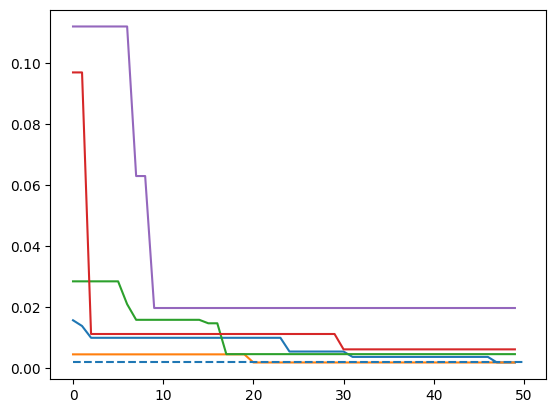

Iteration: 1
Min value: 3.958e-01
Min position: [-1.37289945]
Iteration: 2
Min value: 3.958e-01
Min position: [-1.37289945]
Iteration: 3
Min value: 3.958e-01
Min position: [-1.37289945]
Iteration: 4
Min value: 1.698e-01
Min position: [-1.40045444]
Iteration: 5
Min value: 1.698e-01
Min position: [-1.40045444]
Iteration: 6
Min value: 1.698e-01
Min position: [-1.40045444]
Iteration: 7
Min value: 8.422e-02
Min position: [-1.42961492]
Iteration: 8
Min value: 8.422e-02
Min position: [-1.42961492]
Iteration: 9
Min value: 8.422e-02
Min position: [-1.42961492]
Iteration: 10
Min value: 8.422e-02
Min position: [-1.42961492]
Iteration: 11
Min value: 8.422e-02
Min position: [-1.42961492]
Iteration: 12
Min value: 8.422e-02
Min position: [-1.42961492]
Iteration: 13
Min value: 8.422e-02
Min position: [-1.42961492]
Iteration: 14
Min value: 8.422e-02
Min position: [-1.42961492]
Iteration: 15
Min value: 8.422e-02
Min position: [-1.42961492]
Iteration: 16
Min value: 8.422e-02
Min position: [-1.42961492]
I

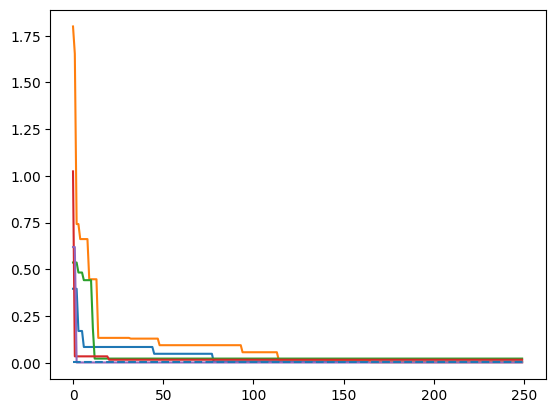

In [ ]:
'''
Типи:
0 - Модуль різниці
1 - Квадрат різниці
'''

xs = [0] * 4
objective = task.Assignment1(1000, 0)
test_BA = opt.BA(100, 0.01, 0.99, objective)
test_CO = opt.CO(1_000, 1, 0.5, objective)

xs[0] = test_BA.main_loop(max_iter=50, init_r=0.9, init_A=1, alpha=0.97, gamma=0.97, delta=0.9, times=5)
xs[1] = test_CO.main_loop(max_iter=250, cookoo=10, times=5)

In [ ]:
print("Bat Algorithm:\n\tMin value: %.2e\tMin point: %s" 
      % xs[0])
print("Cookoo Algorithm:\n\tMin value: %.2e\tMin point: %s" 
      % xs[1])

Bat Algorithm:
	Min value: 1.95e-03	Min point: [-1.41929554]
Cookoo Algorithm:
	Min value: 1.29e-03	Min point: [0.23710418]


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7964\329725764.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[0] = x_a


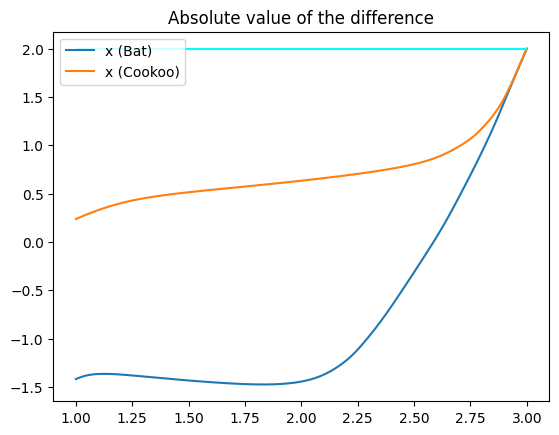

0.0019462108612060547
[-1.41929554]


In [ ]:
t = np.linspace(1, 3, 1001)

x_b, _ = solve_a1(xs[0][1])
x_c, _ = solve_a1(xs[1][1])

plt.title('Absolute value of the difference')
plt.plot(t, x_b, label="x (Bat)")
plt.plot(t, x_c, label="x (Cookoo)")
plt.hlines(xmin=1, xmax=3, y=2, color="cyan")
plt.legend()
plt.show()
print(*xs[0],sep='\n')

Iteration: 1
Min value: 8.465e-05
Min position: [0.23639553]
Iteration: 2
Min value: 8.465e-05
Min position: [0.23639553]
Iteration: 3
Min value: 8.465e-05
Min position: [0.23639553]
Iteration: 4
Min value: 8.465e-05
Min position: [0.23639553]
Iteration: 5
Min value: 8.465e-05
Min position: [0.23639553]
Iteration: 6
Min value: 8.465e-05
Min position: [0.23639553]
Iteration: 7
Min value: 8.465e-05
Min position: [0.23639553]
Iteration: 8
Min value: 4.972e-05
Min position: [0.2374941]
Iteration: 9
Min value: 4.972e-05
Min position: [0.2374941]
Iteration: 10
Min value: 4.972e-05
Min position: [0.2374941]
Iteration: 11
Min value: 4.972e-05
Min position: [0.2374941]
Iteration: 12
Min value: 4.972e-05
Min position: [0.2374941]
Iteration: 13
Min value: 1.107e-06
Min position: [0.23694589]
Iteration: 14
Min value: 1.107e-06
Min position: [0.23694589]
Iteration: 15
Min value: 1.107e-06
Min position: [0.23694589]
Iteration: 16
Min value: 1.107e-06
Min position: [0.23694589]
Iteration: 17
Min valu

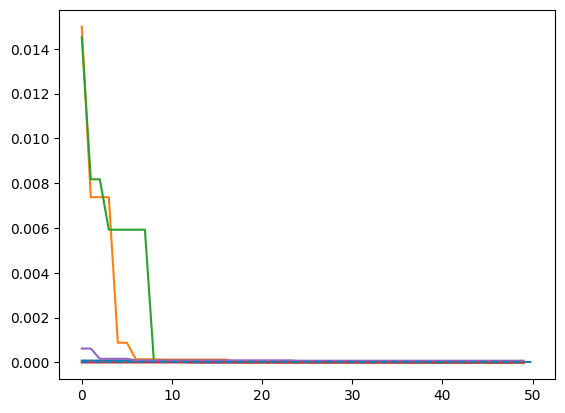

Iteration: 1
Min value: 8.751e-02
Min position: [-1.45992735]
Iteration: 2
Min value: 8.751e-02
Min position: [-1.45992735]
Iteration: 3
Min value: 8.751e-02
Min position: [-1.45992735]
Iteration: 4
Min value: 8.751e-02
Min position: [-1.45992735]
Iteration: 5
Min value: 8.751e-02
Min position: [-1.45992735]
Iteration: 6
Min value: 8.751e-02
Min position: [-1.45992735]
Iteration: 7
Min value: 8.751e-02
Min position: [-1.45992735]
Iteration: 8
Min value: 8.751e-02
Min position: [-1.45992735]
Iteration: 9
Min value: 8.751e-02
Min position: [-1.45992735]
Iteration: 10
Min value: 8.751e-02
Min position: [-1.45992735]
Iteration: 11
Min value: 8.751e-02
Min position: [-1.45992735]
Iteration: 12
Min value: 8.751e-02
Min position: [-1.45992735]
Iteration: 13
Min value: 8.751e-02
Min position: [-1.45992735]
Iteration: 14
Min value: 8.751e-02
Min position: [-1.45992735]
Iteration: 15
Min value: 8.751e-02
Min position: [-1.45992735]
Iteration: 16
Min value: 8.751e-02
Min position: [-1.45992735]
I

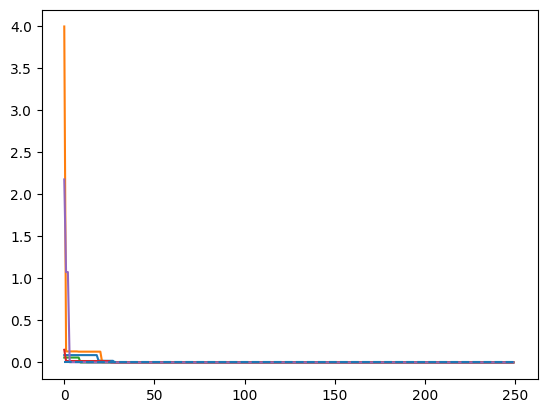

In [ ]:
objective = task.Assignment1(1000, 1)
test_BA = opt.BA(100, 0.01, 0.99, objective)
test_CO = opt.CO(1_000, 1, 0.5, objective)

xs[2] = test_BA.main_loop(max_iter=50, init_r=0.9, init_A=1, alpha=0.97, gamma=0.97, delta=0.9, times=5)
xs[3] = test_CO.main_loop(max_iter=250, cookoo=10, times=5)

In [ ]:
print("Bat Algorithm:\n\tMin value: %.2e\tMin point: %s" 
      % xs[2])
print("Cookoo Algorithm:\n\tMin value: %.2e\tMin point: %s" 
      % xs[3])

Bat Algorithm:
	Min value: 1.15e-07	Min point: [-1.41955948]
Cookoo Algorithm:
	Min value: 2.16e-05	Min point: [-1.41898495]


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7964\329725764.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[0] = x_a


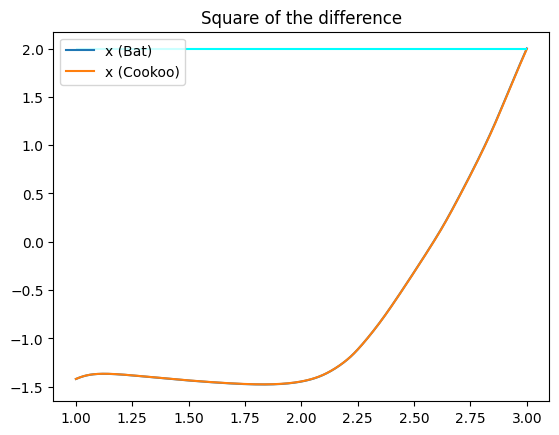

0.0019462108612060547
[-1.41929554]


In [ ]:
x_b, _ = solve_a1(xs[2][1])
x_c, _ = solve_a1(xs[3][1])

plt.title('Square of the difference')
plt.plot(t, x_b, label="x (Bat)")
plt.plot(t, x_c, label="x (Cookoo)")
plt.hlines(xmin=1, xmax=3, y=2, color="cyan")
plt.legend()
plt.show()
print(*xs[0],sep='\n')

Iteration: 1
Min value: 1.693e-01
Min position: [ 1.53837124 -0.59579275]
Iteration: 2
Min value: 5.192e-02
Min position: [ 1.52003668 -0.61412732]
Iteration: 3
Min value: 5.192e-02
Min position: [ 1.52003668 -0.61412732]
Iteration: 4
Min value: 8.205e-03
Min position: [ 1.51269355 -0.62147045]
Iteration: 5
Min value: 7.413e-03
Min position: [ 1.51255901 -0.62160498]
Iteration: 6
Min value: 7.413e-03
Min position: [ 1.51255901 -0.62160498]
Iteration: 7
Min value: 7.413e-03
Min position: [ 1.51255901 -0.62160498]
Iteration: 8
Min value: 7.413e-03
Min position: [ 1.51255901 -0.62160498]
Iteration: 9
Min value: 7.413e-03
Min position: [ 1.51255901 -0.62160498]
Iteration: 10
Min value: 7.413e-03
Min position: [ 1.51255901 -0.62160498]
Iteration: 11
Min value: 7.413e-03
Min position: [ 1.51255901 -0.62160498]
Iteration: 12
Min value: 7.413e-03
Min position: [ 1.51255901 -0.62160498]
Iteration: 13
Min value: 7.413e-03
Min position: [ 1.51255901 -0.62160498]
Iteration: 14
Min value: 7.413e-03

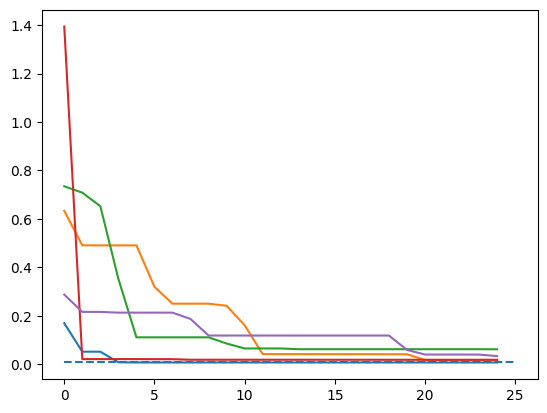

Iteration: 1
Min value: 1.621e+00
Min position: [0.93586813 0.07012178]
Iteration: 2
Min value: 1.621e+00
Min position: [0.93586813 0.07012178]
Iteration: 3
Min value: 1.621e+00
Min position: [0.93586813 0.07012178]
Iteration: 4
Min value: 1.621e+00
Min position: [0.93586813 0.07012178]
Iteration: 5
Min value: 1.621e+00
Min position: [0.93586813 0.07012178]
Iteration: 6
Min value: 1.621e+00
Min position: [0.93586813 0.07012178]
Iteration: 7
Min value: 1.621e+00
Min position: [0.93586813 0.07012178]
Iteration: 8
Min value: 1.621e+00
Min position: [0.93586813 0.07012178]
Iteration: 9
Min value: 1.621e+00
Min position: [0.93586813 0.07012178]
Iteration: 10
Min value: 1.604e+00
Min position: [0.69210972 0.56859209]
Iteration: 11
Min value: 1.604e+00
Min position: [0.69210972 0.56859209]
Iteration: 12
Min value: 1.604e+00
Min position: [0.69210972 0.56859209]
Iteration: 13
Min value: 1.604e+00
Min position: [0.69210972 0.56859209]
Iteration: 14
Min value: 1.604e+00
Min position: [0.69210972

KeyboardInterrupt: 

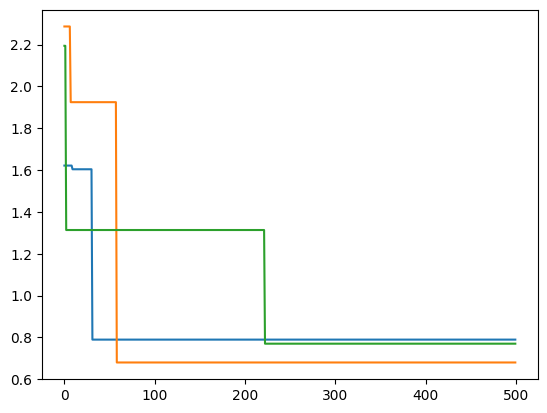

In [ ]:
'''
Типи:
0 - Модуль різниці
1 - Квадрат різниці
2 - Максимум різниці
'''
values = [0] * 6

objective = task.Assignment5(query_type=0)
test_BA = opt.BA(1_000, 0.01, 0.99, objective)
test_CO = opt.CO(10_000, 1, 0.5, objective)

values[0] = min_point_bat1, min_val_bat1 = test_BA.main_loop(max_iter=25, init_r=0.9, init_A=1, alpha=0.97, gamma=0.97, delta=0.9, times=5)
values[1] = min_point_co1, min_val_co1 = test_CO.main_loop(max_iter=500, cookoo=100, times=5)

In [ ]:
print("Bat Algorithm:\n\tMin value: %.2e\tMin point: %s" 
      % (min_point_bat1, min_val_bat1))
print("Cookoo Algorithm:\n\tMin value: %.2e\tMin point: %s" 
      % (min_point_co1, min_val_co1))

Bat Algorithm:
	Min value: 1.79e-02	Min point: [ 1.50551816 -0.61826585]
Cookoo Algorithm:
	Min value: 1.31e+00	Min point: [ 1.95982539 -0.86302105]


In [ ]:
'''
x(3) = 5
y(3) = -1 
'''
x_b, y_b = solve_a5(min_val_bat1)
x_c, y_c = solve_a5(min_val_co1)

plt.title('Absolute value of the difference')
plt.plot(t, x_b, label="x (Bat)")
plt.plot(t, y_b, label="y (Bat)")
plt.plot(t, x_c, label="x (Cookoo)")
plt.plot(t, y_c, label="y (Cookoo)")
plt.hlines(xmin=1, xmax=3, y=[5, -1], color="cyan")
plt.legend()
plt.show()

Iteration: 1
Min value: 1.394e-01
Min position: [ 1.65232501 -0.77208874]
Iteration: 2
Min value: 1.308e-02
Min position: [ 1.44372277 -0.579385  ]
Iteration: 3
Min value: 1.167e-02
Min position: [ 1.45145845 -0.57164932]
Iteration: 4
Min value: 1.167e-02
Min position: [ 1.45145845 -0.57164932]
Iteration: 5
Min value: 1.150e-02
Min position: [ 1.45496103 -0.56814674]
Iteration: 6
Min value: 1.150e-02
Min position: [ 1.45496103 -0.56814674]
Iteration: 7
Min value: 1.150e-02
Min position: [ 1.45496103 -0.56814674]
Iteration: 8
Min value: 1.150e-02
Min position: [ 1.45496103 -0.56814674]
Iteration: 9
Min value: 1.150e-02
Min position: [ 1.45496103 -0.56814674]
Iteration: 10
Min value: 1.150e-02
Min position: [ 1.45496103 -0.56814674]
Iteration: 11
Min value: 1.150e-02
Min position: [ 1.45496103 -0.56814674]
Iteration: 12
Min value: 3.582e-03
Min position: [ 1.53023168 -0.64383614]
Iteration: 13
Min value: 2.579e-03
Min position: [ 1.52698795 -0.64707988]
Iteration: 14
Min value: 2.186e-03

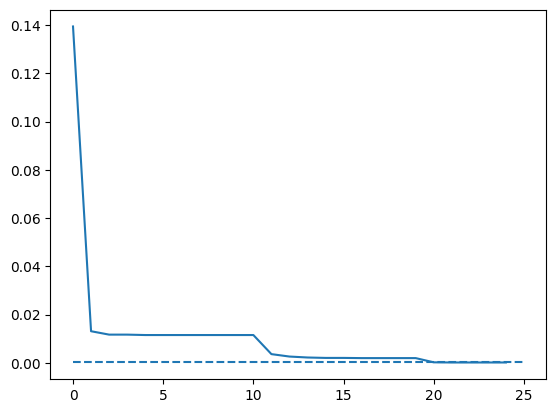

Iteration: 1
Min value: 2.534e+00
Min position: [0.69243145 0.48929032]
Iteration: 2
Min value: 2.534e+00
Min position: [0.69243145 0.48929032]
Iteration: 3
Min value: 2.534e+00
Min position: [0.69243145 0.48929032]
Iteration: 4
Min value: 2.534e+00
Min position: [0.69243145 0.48929032]
Iteration: 5
Min value: 2.534e+00
Min position: [0.69243145 0.48929032]
Iteration: 6
Min value: 2.534e+00
Min position: [0.69243145 0.48929032]
Iteration: 7
Min value: 2.534e+00
Min position: [0.69243145 0.48929032]
Iteration: 8
Min value: 2.534e+00
Min position: [0.69243145 0.48929032]
Iteration: 9
Min value: 2.534e+00
Min position: [0.69243145 0.48929032]
Iteration: 10
Min value: 2.534e+00
Min position: [0.69243145 0.48929032]
Iteration: 11
Min value: 2.534e+00
Min position: [0.69243145 0.48929032]
Iteration: 12
Min value: 2.534e+00
Min position: [0.69243145 0.48929032]
Iteration: 13
Min value: 2.534e+00
Min position: [0.69243145 0.48929032]
Iteration: 14
Min value: 2.534e+00
Min position: [0.69243145

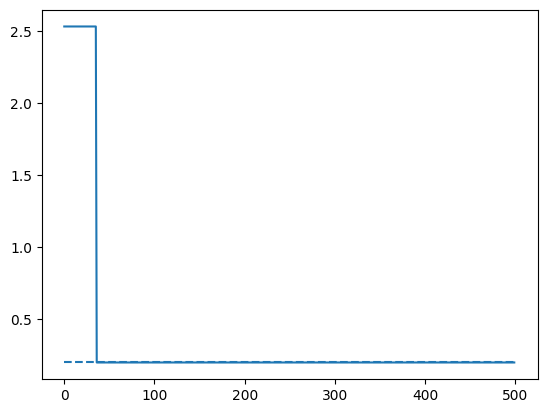

In [ ]:
objective = task.Assignment5(query_type=1)
test_BA = opt.BA(1_000, 0.01, 0.99, objective)
test_CO = opt.CO(10_000, 1, 0.5, objective)

values[2] = min_point_bat2, min_val_bat2 = test_BA.main_loop(max_iter=25, init_r=0.9, init_A=1, alpha=0.97, gamma=0.97, delta=0.9, times=5)
values[3] = min_point_co2, min_val_co2 = test_CO.main_loop(max_iter=500, cookoo=100, times=5)

In [ ]:
print("Bat Algorithm:\n\tMin value: %.2e\tMin point: %s" 
      % (min_point_bat2, min_val_bat2))
print("Cookoo Algorithm:\n\tMin value: %.2e\tMin point: %s" 
      % (min_point_co2, min_val_co2))

Bat Algorithm:
	Min value: 1.20e-04	Min point: [ 1.50913634 -0.6271935 ]
Cookoo Algorithm:
	Min value: 2.00e-01	Min point: [ 1.32281408 -0.42114799]


In [ ]:
'''
x(3) = 5
y(3) = -1 
'''
x_b, y_b = solve_a5(min_val_bat2)
x_c, y_c = solve_a5(min_val_co2)

plt.title('Square of the difference')
plt.plot(t, x_b, label="x (Bat)")
plt.plot(t, y_b, label="y (Bat)")
plt.plot(t, x_c, label="x (Cookoo)")
plt.plot(t, y_c, label="y (Cookoo)")
plt.hlines(xmin=1, xmax=3, y=[5, -1], color="cyan")
plt.legend()
plt.show()

Iteration: 1
Min value: 3.292e-01
Min position: [ 1.64468251 -0.70767019]
Iteration: 2
Min value: 2.043e-01
Min position: [ 1.58050193 -0.77185077]
Iteration: 3
Min value: 1.917e-01
Min position: [ 1.57485702 -0.77749567]
Iteration: 4
Min value: 1.917e-01
Min position: [ 1.57485702 -0.77749567]
Iteration: 5
Min value: 1.917e-01
Min position: [ 1.57485702 -0.77749567]
Iteration: 6
Min value: 1.909e-01
Min position: [ 1.57371129 -0.77864141]
Iteration: 7
Min value: 1.288e-01
Min position: [ 1.54992774 -0.71686258]
Iteration: 8
Min value: 1.165e-01
Min position: [ 1.54411527 -0.72267505]
Iteration: 9
Min value: 1.165e-01
Min position: [ 1.54411527 -0.72267505]
Iteration: 10
Min value: 1.165e-01
Min position: [ 1.54411527 -0.72267505]
Iteration: 11
Min value: 1.165e-01
Min position: [ 1.54411527 -0.72267505]
Iteration: 12
Min value: 3.715e-02
Min position: [ 1.52025363 -0.65959006]
Iteration: 13
Min value: 3.715e-02
Min position: [ 1.52025363 -0.65959006]
Iteration: 14
Min value: 3.715e-02

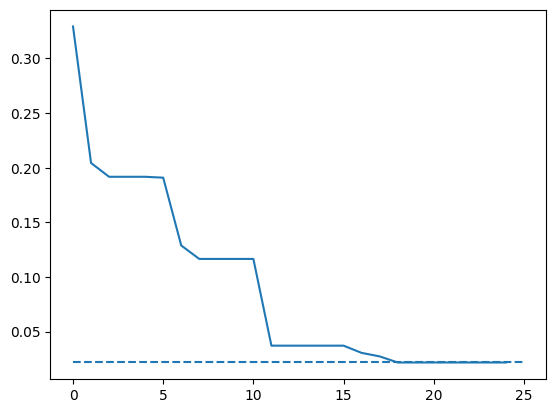

Iteration: 1
Min value: 2.283e+00
Min position: [0.38788382 0.40673651]
Iteration: 2
Min value: 2.283e+00
Min position: [0.38788382 0.40673651]
Iteration: 3
Min value: 1.825e+00
Min position: [2.31671865 0.45593468]
Iteration: 4
Min value: 1.825e+00
Min position: [2.31671865 0.45593468]
Iteration: 5
Min value: 1.825e+00
Min position: [2.31671865 0.45593468]
Iteration: 6
Min value: 1.825e+00
Min position: [2.31671865 0.45593468]
Iteration: 7
Min value: 1.825e+00
Min position: [2.31671865 0.45593468]
Iteration: 8
Min value: 1.825e+00
Min position: [2.31671865 0.45593468]
Iteration: 9
Min value: 1.825e+00
Min position: [2.31671865 0.45593468]
Iteration: 10
Min value: 1.825e+00
Min position: [2.31671865 0.45593468]
Iteration: 11
Min value: 1.825e+00
Min position: [2.31671865 0.45593468]
Iteration: 12
Min value: 1.825e+00
Min position: [2.31671865 0.45593468]
Iteration: 13
Min value: 1.825e+00
Min position: [2.31671865 0.45593468]
Iteration: 14
Min value: 9.409e-01
Min position: [ 1.1378559

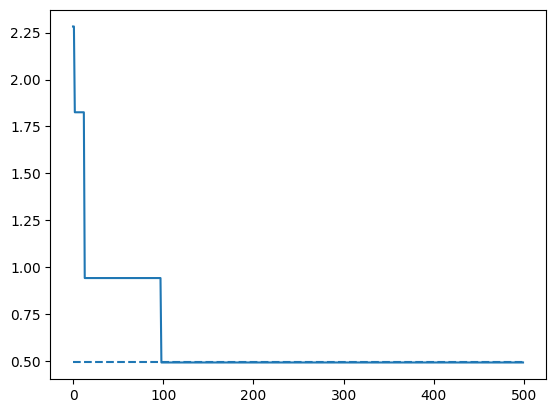

In [ ]:
objective = task.Assignment5(query_type=2)
test_BA = opt.BA(1_000, 0.01, 0.99, objective)
test_CO = opt.CO(10_000, 1, 0.5, objective)

values[4] = min_point_bat3, min_val_bat3 = test_BA.main_loop(max_iter=25, init_r=0.9, init_A=1, alpha=0.97, gamma=0.97, delta=0.9, times=5)
values[5] = min_point_co3, min_val_co3 = test_CO.main_loop(max_iter=500, cookoo=100, times=5)

In [ ]:
print("Bat Algorithm:\n\tMin value: %.2e\tMin point: %s" 
      % (min_point_bat3, min_val_bat3))
print("Cookoo Algorithm:\n\tMin value: %.2e\tMin point: %s" 
      % (min_point_co3, min_val_co3))

Bat Algorithm:
	Min value: 2.18e-02	Min point: [ 1.51625338 -0.64428169]
Cookoo Algorithm:
	Min value: 4.91e-01	Min point: [ 1.2952112  -0.42278814]


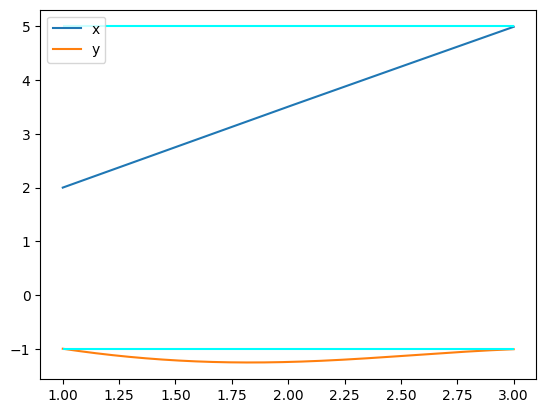

In [ ]:
'''
x(3) = 5
y(3) = -1 
'''
x_b, y_b = solve_a5(min_val_bat3)
x_c, y_c = solve_a5(min_val_co3)

plt.title('Max of absolute values of the difference')
plt.plot(t, x_b, label="x (Bat)")
plt.plot(t, y_b, label="y (Bat)")
plt.plot(t, x_c, label="x (Cookoo)")
plt.plot(t, y_c, label="y (Cookoo)")
plt.hlines(xmin=1, xmax=3, y=[5, -1], color="cyan")
plt.legend()
plt.show()